##### About Dataset

Dataset of songs of various artist in the world and for each song is present:

- Several statistics of the music version on spotify, including the number of streams;
- Number of views of the official music video of the song on youtube.

##### Content

it includes 26 variables for each of the songs collected from spotify. These variables are briefly described next:

- Track: name of the song, as visible on the Spotify platform.
- Artist: name of the artist.
- Url_spotify: the Url of the song.
- Album: the album in wich the song is contained on Spotify.
- Album_type: indicates if the song is relesead on Spotify as a single or contained in an album.
- Uri: a spotify link used to find the song through the API.
- Danceability: describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- Energy: is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- Key: the key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- Loudness: the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
- Speechiness: detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- Acousticness: a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- Instrumentalness: predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- Liveness: detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- Valence: a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- Tempo: the overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- Duration_ms: the duration of the track in milliseconds.
- Stream: number of streams of the song on Spotify.
- Url_youtube: url of the video linked to the song on Youtube, if it have any.
- Title: title of the videoclip on youtube.
- Channel: name of the channel that have published the video.
- Views: number of views.
- Likes: number of likes.
- Comments: number of comments.
- Description: description of the video on Youtube.
- Licensed: Indicates whether the video represents licensed content, which means that the content was uploaded to a channel linked to a YouTube content partner and then claimed by that partner.
- official_video: boolean value that indicates if the video found is the official video of the song.
 



In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("Data.csv")


In [3]:
df.head(3)

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
Unnamed: 0          20718 non-null int64
Artist              20718 non-null object
Url_spotify         20718 non-null object
Track               20718 non-null object
Album               20718 non-null object
Album_type          20718 non-null object
Uri                 20718 non-null object
Danceability        20716 non-null float64
Energy              20716 non-null float64
Key                 20716 non-null float64
Loudness            20716 non-null float64
Speechiness         20716 non-null float64
Acousticness        20716 non-null float64
Instrumentalness    20716 non-null float64
Liveness            20716 non-null float64
Valence             20716 non-null float64
Tempo               20716 non-null float64
Duration_ms         20716 non-null float64
Url_youtube         20248 non-null object
Title               20248 non-null object
Channel             20248 non-null object

We can get rid of a few columns, (Url_youtube, Description, Uri, Url_spotify, key), and we can also get rid of duplicate tracks.

In [5]:
views = df.copy()

In [6]:
views.drop(['Unnamed: 0', 'Url_spotify','Uri','Url_youtube','Description','Key'], axis = 1, inplace = True)
views.dropna(inplace = True)
views = views.drop_duplicates(subset='Track')

In [7]:
views.head(2)

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Tempo,Duration_ms,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.00836,0.002330,...,138.559,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.08690,0.000687,...,92.761,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08


#### EDA

In [8]:
(1 - len(views[views['Views'] < 1000000000]) / len(views)) * 100


1.2569666785248401

only 1.25% of these videos have reached a billion views. Thus, 98% of the top songs lie between 0-1b views.

In [9]:
(1 - len(views[views['Views'] < 100000000]) / len(views)) * 100


18.623265741728922

About 18% of these videos have reached a billion views. Thus, 98% of the top songs lie between 0-100 M views.

Videos with the highest like ratios


In [10]:
views['like_percent'] = views['Likes']/ views['Views']
views['like_percent'] = views['like_percent'].apply(lambda x: round(x, 3))
df2 = views[views['Views'] > 5000000]
df2.sort_values(by = 'like_percent', ascending = False).head(10)[['Artist', 'Track', 'Views', 'like_percent']]

,Artist,Track,Views,like_percent
19970,j-hope,Blue Side (Outro),16504576.0,0.143
8098,RM,Still Life (with Anderson .Paak),14483104.0,0.112
19963,j-hope,Arson,42659733.0,0.095
18889,NCT DREAM,Life Is Still Going On,10972776.0,0.084
8097,RM,Wild Flower (with youjeen),46284905.0,0.081
9695,Megan Thee Stallion,Butter - Megan Thee Stallion Remix,69255155.0,0.079
12490,Taylor Swift,Lavender Haze,14004124.0,0.077
12224,Wale,Change,23052210.0,0.074
18467,Louis Tomlinson,Bigger Than Me,5894217.0,0.072
16909,Dove Cameron,Breakfast,11977137.0,0.066


Most viewed

Artist
Katy Perry       1.241747e+10
Daddy Yankee     1.087193e+10
Ed Sheeran       1.083350e+10
Coldplay         9.997278e+09
BLACKPINK        9.392962e+09
Eminem           9.119324e+09
Shakira          8.673449e+09
Fifth Harmony    8.574436e+09
Bruno Mars       8.448479e+09
Sia              8.441835e+09
Name: Views, dtype: float64


,Track,Artist,Views
365,Despacito,Daddy Yankee,8.079647e+09
12452,Shape of You,Ed Sheeran,5.908398e+09
12469,See You Again (feat. Charlie Puth),Wiz Khalifa,5.773797e+09
20303,Wheels on the Bus,CoComelon,4.898831e+09
10686,Uptown Funk (feat. Bruno Mars),Mark Ronson,4.821016e+09
8937,Gangnam Style (강남스타일),PSY,4.679767e+09
13032,Roar,Katy Perry,3.725749e+09
13040,Counting Stars,OneRepublic,3.721610e+09
14074,Sorry,Justin Bieber,3.627306e+09
12455,Thinking out Loud,Ed Sheeran,3.547156e+09


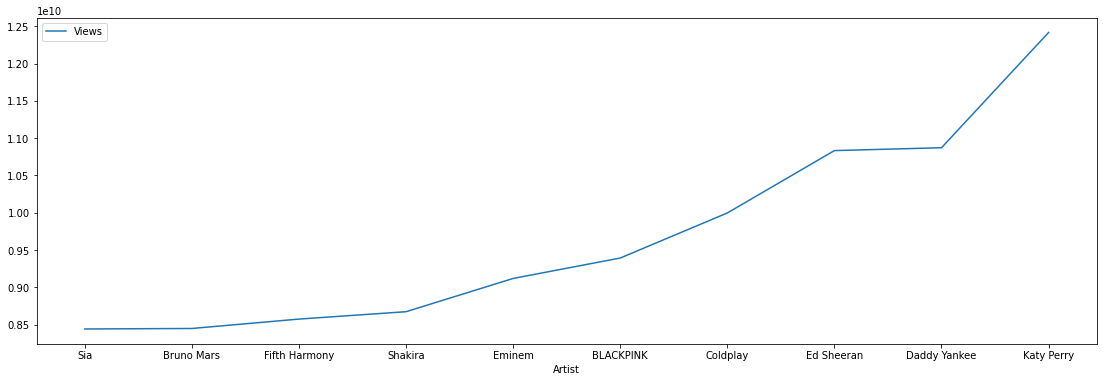

In [11]:
artists = views.groupby('Artist').sum()['Views'].sort_values(ascending = False).head(10)
artists = artists.sort_values(ascending = True)
artists_df = pd.DataFrame({'Views': artists})
artists_df.index.name = 'Artist'
plt.figure(figsize=(19,6))
sns.lineplot(data=artists_df)

print(views.groupby('Artist').sum()['Views'].sort_values(ascending = False).head(10))

views.sort_values(by = 'Views', ascending = False)[['Track', 'Artist', 'Views']].head(10)

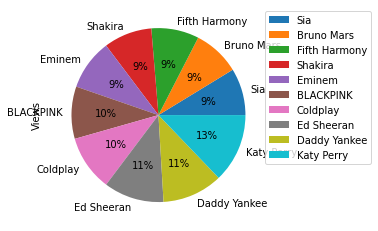

In [12]:
artists_df.plot.pie(y = 'Views',autopct = '%1.0f%%').legend(bbox_to_anchor = (1.5, 1))

Most Streamed

Artist
Coldplay         1.177848e+10
Khalid           1.118377e+10
The Weeknd       1.114888e+10
XXXTENTACION     1.094868e+10
Ariana Grande    1.085741e+10
Post Malone      1.059455e+10
Ed Sheeran       1.001450e+10
Eminem           9.748588e+09
Bruno Mars       9.433506e+09
Queen            9.384534e+09
Name: Stream, dtype: float64


,Track,Artist,Stream
15250,Blinding Lights,The Weeknd,3.386520e+09
12452,Shape of You,Ed Sheeran,3.362005e+09
19186,Someone You Loved,Lewis Capaldi,2.634013e+09
17937,rockstar (feat. 21 Savage),Post Malone,2.594927e+09
17445,Sunflower - Spider-Man: Into the Spider-Verse,Swae Lee,2.538330e+09
13503,One Dance,Drake,2.522432e+09
14030,Believer,Imagine Dragons,2.369272e+09
14069,STAY (with Justin Bieber),Justin Bieber,2.365778e+09
17288,Señorita,Shawn Mendes,2.336220e+09
16138,Heat Waves,Glass Animals,2.261464e+09


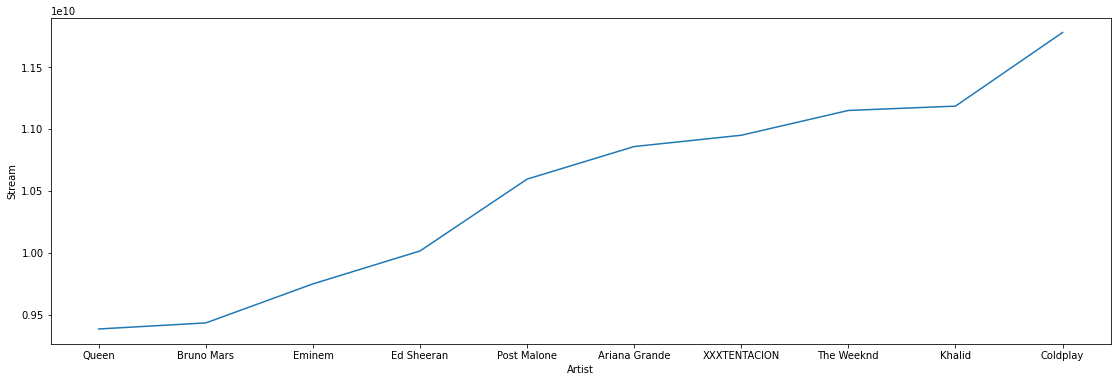

In [13]:
artists2 = views.groupby('Artist').sum()['Stream'].sort_values(ascending=False).head(10)
artists2 = artists2.sort_values(ascending=True)
artists2_df = pd.DataFrame({'Stream': artists2})
artists2_df.index.name = 'Artist'
plt.figure(figsize=(19,6))
sns.lineplot(data=artists2_df, x='Artist', y='Stream')


print(views.groupby('Artist').sum()['Stream'].sort_values(ascending = False).head(10))

views.sort_values(by = 'Stream', ascending = False)[['Track', 'Artist', 'Stream']].head(10)

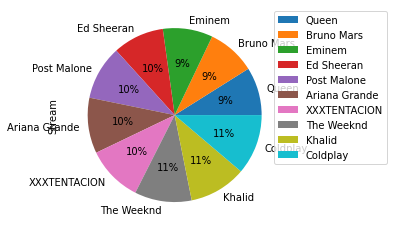

In [14]:
artists2_df.plot.pie(y = 'Stream', autopct = '%1.0f%%').legend(bbox_to_anchor = (1.5, 1))

Our Top Albums

In [15]:
pd.DataFrame(views.groupby('Album').sum()['Views'].sort_values(ascending = False).head(10))

,Views
Album,
VIDA,1.081557e+10
PRISM,7.820546e+09
"CoComelon Kids Hits, Vol. 1",7.031693e+09
÷ (Deluxe),6.305553e+09
See You Again (feat. Charlie Puth),5.773797e+09
What Is Love? (Deluxe Edition),5.069700e+09
Uptown Special,4.821016e+09
Gangnam Style (강남스타일),4.679767e+09
Title (Deluxe),4.630574e+09


In [16]:
views['Duration_ms']

0        222640.0
1        200173.0
2        215150.0
3        233867.0
4        340920.0
           ...   
20713     94667.0
20714    150857.0
20715    136842.0
20716    108387.0
20717    181500.0
Name: Duration_ms, Length: 16866, dtype: float64

Since Duration is in Milli seconds, we can divide it by 1000 and then by 60 to convert it into minutes, and then see the distribution of duration of tracks in minutes

In [17]:
views['dur_min']= (views['Duration_ms']/1000)/60
views['dur_min'].head()

print("Longest Song")
print("")
print("")
print("")
print("")
print("")
print("")
print("")



print("Average Song duration")
print(views['dur_min'].mean())

Longest Song







Average Song duration
3.7114583422269654


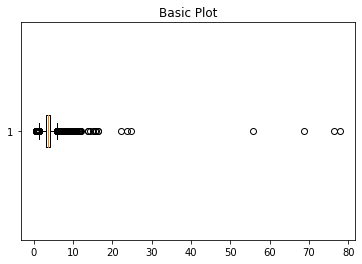

In [18]:
fig2, ax2 = plt.subplots()
ax2.set_title('Basic Plot')
ax2.boxplot(views['dur_min'],vert=False)
plt.show()

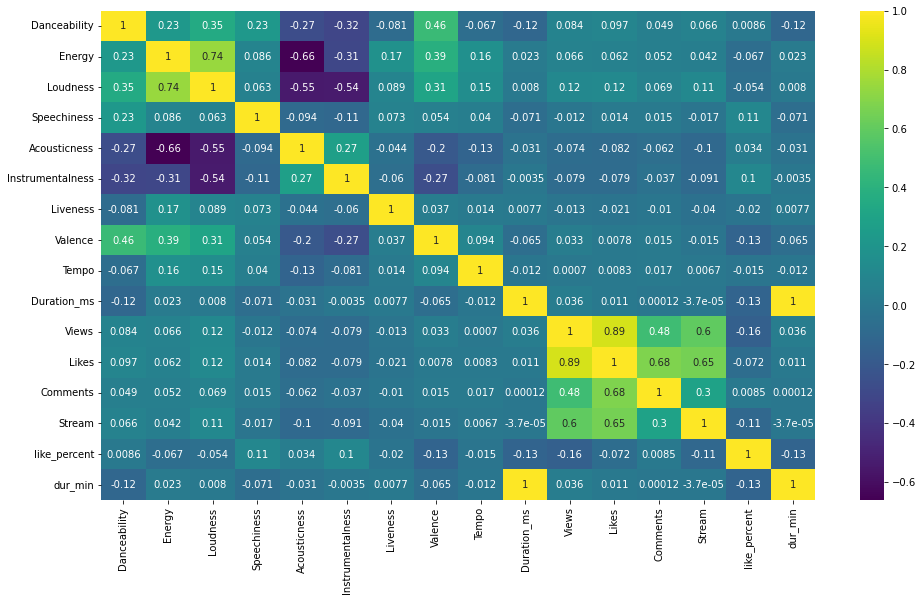

In [19]:
numerical = views.select_dtypes(include=[np.number]).columns.tolist()

corr= views[numerical].corr()

plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True, cmap='viridis');

We see the highest of correlations between Streaming and likes, Comments and likes, Likes and Views, Views and Streaming, all of this goes to say is common knowledge, the more streaming, the more views we get, the more views, the more likes and commments we have. 

In [20]:
# Define your independent variables
X = views[['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']]

# Define your dependent variables
y = views[['Views', 'Stream', 'Likes']]

# assume X contains the predictor variables and y contains the response variables
# X should be a 2D array or DataFrame, with shape (n_samples, n_predictors)
# y should be a 2D array or DataFrame, with shape (n_samples, n_responses)
# in this example, we assume X and y are already loaded into memory

# create a LinearRegression object
model = LinearRegression()

# fit the model to the data
model.fit(X, y)

# print the coefficients
print("print the coefficients")
print(model.coef_)

# print the intercept
print("print the intercept")
print(model.intercept_)

print the coefficients
[[ 1.14209086e+08  3.79261537e+07 -8.89217473e+07 -2.58346161e+07
  -6.78779792e+07 -2.04806902e+07 -3.09894768e+07 -2.67383536e+04]
 [ 8.23735153e+07 -2.85759590e+07 -8.61835098e+07 -8.26587577e+07
  -9.38029783e+07 -4.91687717e+07 -6.61233177e+07  2.92752835e+04]
 [ 9.86534672e+05  2.35690202e+05 -2.29745687e+05 -2.06965379e+05
  -4.15546836e+05 -1.86791727e+05 -4.65239435e+05  4.75887128e+02]]
print the intercept
[3.62831573e+07 1.75443098e+08 1.79902516e+05]


The coefficients represent the estimated effects of the predictor variables (Danceability, Energy, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, and Tempo) on the response variables (Views, Stream, and Likes). The coefficients are interpreted as follows:

For the first set of coefficients, the estimated effect of Danceability is positive and the largest of all coefficients. This indicates that as Danceability increases, so do Views, Stream, and Likes. The coefficients for Energy, Speechiness, Acousticness, Instrumentalness, Liveness, and Valence are all negative, which suggests that increases in these predictor variables are associated with decreases in Views, Stream, and Likes. The coefficient for Tempo is close to zero, which suggests that this predictor variable does not have a strong effect on the response variables.

The intercepts (model.intercept_) represent the estimated value of the response variables (Views, Stream, and Likes) when all predictor variables are equal to zero. These values can be interpreted as baseline values. For example, the first intercept of 3.62831573e+07 suggests that when all predictor variables are equal to zero, the expected value of Views is approximately 36.3 million.

Note that interpretation of coefficients in multiple linear regression is more complex than just looking at their signs, magnitudes and comparing them. It's also important to check for any multicollinearity issues, assess the overall fit of the model, check assumptions such as linearity, normality, homoscedasticity and absence of influential outliers, and consider other relevant factors for the problem at hand.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

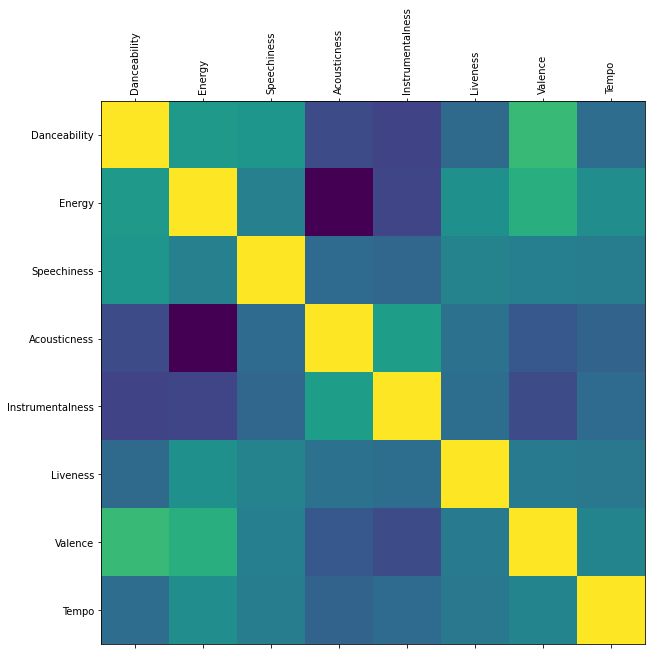

In [31]:
corr = df[['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']].corr()

fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

##### First approach

In [34]:
X = views[['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']]
y = views[['Views', 'Stream', 'Likes']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [35]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = reg.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.014891633800966586
RMSE: 189431855.62296736


This is considered a poor fit as R^2 is close to 0. RMSE is also a huge number which is not an indication of a good model.

##### Predicted vs actual values

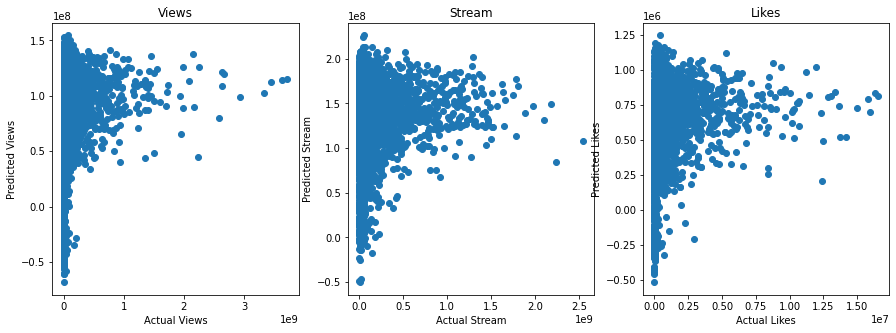

In [37]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(y.columns):
    axs[i].scatter(y_test[col], y_pred[:, i])
    axs[i].set_xlabel('Actual ' + col)
    axs[i].set_ylabel('Predicted ' + col)
    axs[i].set_title(col)

plt.show()

###### Checking for normality in residuals

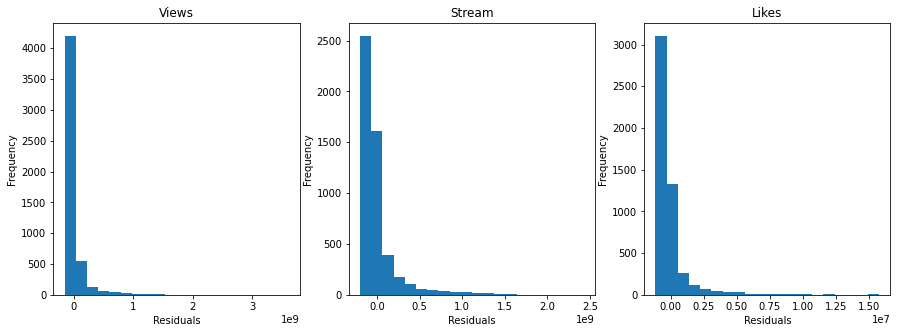

In [38]:
residuals = y_test - y_pred
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(y.columns):
    axs[i].hist(residuals[col], bins=20)
    axs[i].set_xlabel('Residuals')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(col)

plt.show()
